# Carrington sunmap

In [128]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy import wcs

import sunpy.map
from sunpy.coordinates import frames
from sunpy.map.header_helper import make_heliographic_header

import matplotlib.pyplot as plt

from module import readFitsBz2

In [129]:
filename = 'carrington_test_data/imoa_03933_l2_20240323_14012772_emi1.fts.bz2'

hdu = readFitsBz2(filename)

In [130]:
hdu.header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
EXTEND  =                    T                                                  
BSCALE  =                    1                                                  
BZERO   =                32768 / offset data range to that unsigned short       
DATE    = '2024-03-23T14:01:27.72' / file creation date (YYYY-MM-DDThh:mm:ss UT)
FILENAME= 'imoa_03933_l2_20240323_14012772_b1.fts' / Original filename          
DATE_OBS= '2024-03-23T14:01:00.00' / Date start of the observation UT           
EXPTIME =                  0.3 / [s] Exposure time                              
CAMTEM  =                 0.

In [131]:
coord = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=hdu.header['DATE_OBS'],
                 observer='earth', frame=frames.Helioprojective)
    
header = sunpy.map.make_fitswcs_header(hdu.data, coord,
                                    reference_pixel=[hdu.header['CRPIX1'], hdu.header['CRPIX2']]*u.pixel,
                                    scale=[1.2,1.2]*u.arcsec/u.pixel,)

In [132]:
map = sunpy.map.Map(hdu.data, header)

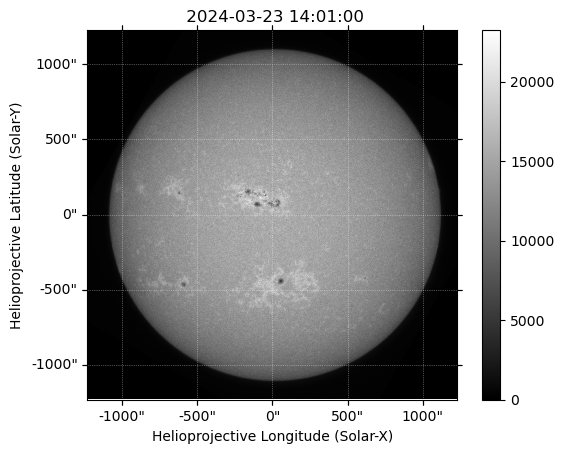

In [133]:
fig = plt.figure()
ax = fig.add_subplot(projection=map)
im = map.plot(axes=ax)
plt.colorbar(im, ax=ax)

In [134]:
carr_header = make_heliographic_header(map.date, map.observer_coordinate, hdu.data.shape, frame='carrington')

outmap = map.reproject_to(carr_header)

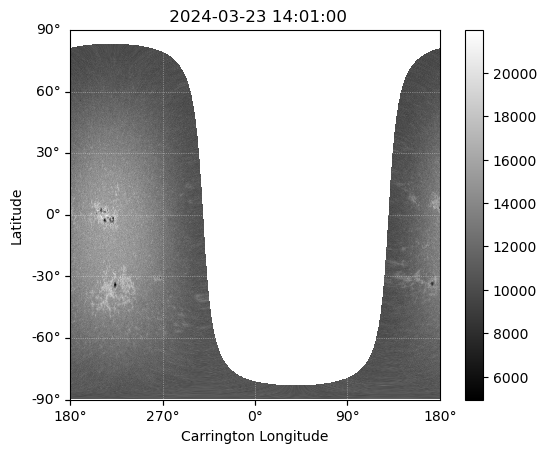

In [135]:
fig = plt.figure()
ax = fig.add_subplot(projection=outmap)
im = outmap.plot(axes=ax)
plt.colorbar(im, ax=ax)

In [136]:
outmap.carrington_longitude.rad

3.834380914570063

In [137]:
outmap.carrington_longitude.deg

219.69384345037727